In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
dataset = pd.read_csv('combined_data.csv')
print(dataset.columns)
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

Index(['Unnamed: 0', 'text', 'sentiment'], dtype='object')


In [3]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [4]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
    print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


# Replace sentence data with encoded subwords
Now, we'll re-create the dataset to be used for training by actually encoding each of the individual sentences. This is equivalent to text_to_sequences with the Tokenizer we used in earlier exercises.

In [5]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)
    
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


In [6]:
max_length = 50
trunc_type='post'
padding_type='post'

sentences_padded = tf.keras.preprocessing.sequence.pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

total = int(len(sentences) * 0.8)

training_padded = sentences_padded[0:total]
testing_padded = sentences_padded[total:]

training_label = labels[0:total]
testing_label = labels[total:]

#converting labels into Arrays
training_label_array = np.array(training_label)
testing_label_array = np.array(testing_label)

In [7]:
#creating the model
embedding_dim = 16
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
history = model.fit(training_padded, training_label_array, epochs=30, validation_data=(testing_padded,testing_label_array))

Epoch 1/30


C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


41/50 [=======================>......] - ETA: 0s - loss: 0.6934 - accuracy: 0.4916WARNING:tensorflow:Model was constructed with shape (None, 50) for input KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 315).


50/50 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6943 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5223 - val_loss: 0.6959 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5223 - val_loss: 0.6971 - val_accuracy: 0.4110
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5223 - val_loss: 0.6978 - val_accuracy: 0.4110
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5223 - val_loss: 0.6985 - val_accuracy: 0.4110
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5223 - val_loss: 0.6983 - val_accuracy: 0.4110
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5223 - val_loss: 0.6963 - val_accuracy: 0.4110
Epoch 8/30
50/50 [=============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


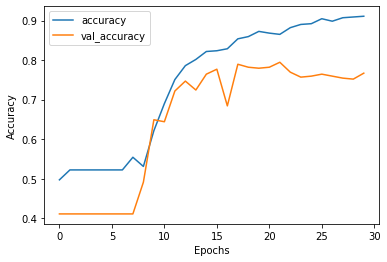

In [10]:
import matplotlib.pyplot as plt
columns = history.history.keys()
print(columns)
def plot_graph():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

plot_graph()